# FantaBayesianNet

In [ ]:
import sys
!{sys.executable} -m pip install pgmpy
!{sys.executable} -m pip install --upgrade pip

     |████████████████████████████████| 337kB 7.0MB/s 
     |████████████████████████████████| 1.5MB 6.4MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


## 1. Define the model
The first step consists in building the structure of our model, that is to define the relations between the involved variables.
In the following lines we define the network model using pgmpy library and I display the resulting graph using networkx.

In [ ]:
from pgmpy.models import BayesianModel

# Grade = ([<=5.5], [6-7], [7.5-9], [>=9.5])


model = BayesianModel([('available', 'starter'),
                       ('starter', 'time_range'),
                       ('time_range', 'red_card'),
                       ('time_range', 'yellow_card'),
                       ('time_range', 'goal'),
                       ('time_range', 'assist'),
                       ('red_card', 'grade_range'),
                       ('yellow_card', 'grade_range'),
                       ('goal', 'grade_range'),
                       ('assist', 'grade_range'),
                       #('difficulty_match', 'deployability'),
                       ('grade_range', 'deployability'),
                       ('time_range', 'deployability')
                       ])

model_2 = BayesianModel([('red_card', 'grade_range'),
                       ('yellow_card', 'grade_range'),
                       ('goal', 'grade_range'),
                       ('assist', 'grade_range'),
                       ('available', 'starter'),
                       ('starter', 'time_range'),
                       ('time_range', 'grade_range'), 
                       ('difficulty_match', 'deployability'),
                       ('grade_range', 'deployability'),
                       ('time_range', 'deployability')
                       ])

#Network nodes and out-edges
nodes = list(model.nodes())
edges = list(model.edges())
print("Nodes:", nodes)
print("\nOutEdges:", edges)

Nodes: ['available', 'starter', 'time_range', 'red_card', 'yellow_card', 'goal', 'assist', 'grade_range', 'deployability']

OutEdges: [('available', 'starter'), ('starter', 'time_range'), ('time_range', 'red_card'), ('time_range', 'yellow_card'), ('time_range', 'goal'), ('time_range', 'assist'), ('time_range', 'deployability'), ('red_card', 'grade_range'), ('yellow_card', 'grade_range'), ('goal', 'grade_range'), ('assist', 'grade_range'), ('grade_range', 'deployability')]


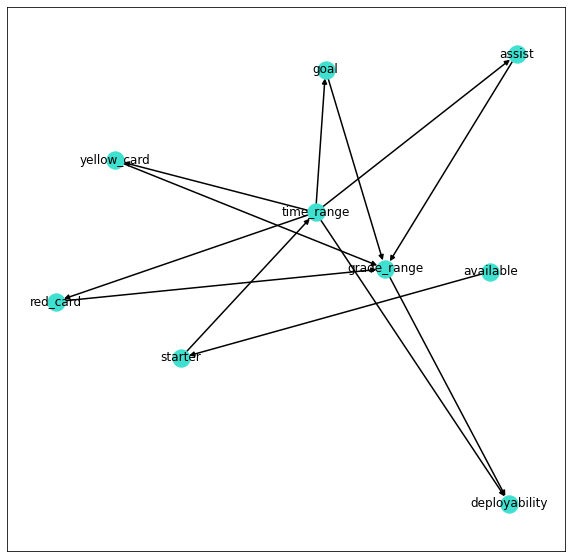

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
%matplotlib inline
np.random.seed(8)

DAG = nx.DiGraph()
DAG.add_edges_from(edges)

fig = plt.figure(figsize = (10,10))
pos = nx.spring_layout(DAG) #Position nodes computed by using Fruchterman-Reingold force-directed algorithm.
nx.draw_networkx_nodes(DAG, pos=pos, node_color='turquoise')
nx.draw_networkx_labels(DAG, pos=pos)
nx.draw_networkx_edges(DAG, pos=pos, edge_color='black', width = 1.5, arrows=True)
plt.show()

# 

In [ ]:
from google.colab import files
upload = files.upload()

Saving stats_barrow.csv to stats_barrow.csv
Saving stats_belotti.csv to stats_belotti.csv
Saving stats_berardi.csv to stats_berardi.csv
Saving stats_caicedo.csv to stats_caicedo.csv
Saving stats_caputo.csv to stats_caputo.csv
Saving stats_correa.csv to stats_correa.csv
Saving stats_cristiano_ronaldo.csv to stats_cristiano_ronaldo.csv
Saving stats_destro.csv to stats_destro.csv
Saving stats_dzeko.csv to stats_dzeko.csv
Saving stats_ibrahimovic.csv to stats_ibrahimovic.csv
Saving stats_ilicic.csv to stats_ilicic.csv
Saving stats_immobile.csv to stats_immobile.csv
Saving stats_insigne.csv to stats_insigne.csv
Saving stats_joão_pedro.csv to stats_joão_pedro.csv
Saving stats_lozano.csv to stats_lozano.csv
Saving stats_lukaku.csv to stats_lukaku.csv
Saving stats_martínez.csv to stats_martínez.csv
Saving stats_mayoral.csv to stats_mayoral.csv
Saving stats_messias.csv to stats_messias.csv
Saving stats_morata.csv to stats_morata.csv
Saving stats_muriel.csv to stats_muriel.csv
Saving stats_nzola

# 2. Fitting the data

In [ ]:
import pandas as pd
from pgmpy.estimators import BayesianEstimator

# Loading player dataframe (Immobile)
model_immobile = model.copy()
df_immobile = pd.read_csv("stats_immobile.csv")
# Fitting model
model_immobile.fit(df_immobile, estimator=BayesianEstimator,prior_type="BDeu",equivalent_sample_size=10,complete_samples_only=False)
print("Immobile")
print(model_immobile.get_cpds("grade_range"))

# Loading Ibrahimovic data
model_ibrahimovic = model.copy()
df_ibrahimovic = pd.read_csv("stats_ibrahimovic.csv")
# Fitting model
model_ibrahimovic.fit(df_ibrahimovic, estimator=BayesianEstimator,prior_type='BDeu', equivalent_sample_size=1000)
#print("Ibrahimovic")
#print(model_ibrahimovic.get_cpds("deployability"))

# Second version of the model, it provides better results wrt the real domain but smoothing...
model_immobile_2 = model_2.copy()
# Fitting model
model_immobile_2.fit(df_immobile, estimator=BayesianEstimator,prior_type="BDeu",equivalent_sample_size=10,complete_samples_only=False)
print("Immobile second model")
print(model_immobile_2.get_cpds("grade_range"))

Immobile
+--------------------+----------------------+-------------------+---------------------+-------------------+----------------------+---------------------+--------------------+-------------------+----------------------+-------------------+--------------------+-------------------+---------------------+---------------------+--------------------+-------------------+
| assist             | assist(False)        | assist(False)     | assist(False)       | assist(False)     | assist(False)        | assist(False)       | assist(False)      | assist(False)     | assist(True)         | assist(True)      | assist(True)       | assist(True)      | assist(True)        | assist(True)        | assist(True)       | assist(True)      |
+--------------------+----------------------+-------------------+---------------------+-------------------+----------------------+---------------------+--------------------+-------------------+----------------------+-------------------+--------------------+--------

Immobile second model
+--------------------+---------------------+-------------------+--------------------+-------------------+----------------------+-------------------+--------------------+-------------------+--------------------+-------------------+---------------------+-------------------+--------------------+-------------------+--------------------+---------------------+----------------------+-------------------+--------------------+-------------------+--------------------+-------------------+--------------------+-------------------+--------------------+-------------------+--------------------+-------------------+---------------------+-------------------+--------------------+-------------------+--------------------+-------------------+--------------------+-------------------+--------------------+-------------------+--------------------+-------------------+---------------------+---------------------+--------------------+-------------------+--------------------+-------------------+-

In [ ]:
df_ibrahimovic = pd.read_csv("stats_ibrahimovic.csv")
df_immobile = pd.read_csv("stats_immobile.csv")
df_muriel = pd.read_csv("stats_muriel.csv")
df_simy = pd.read_csv("stats_simy.csv")
df_lozano = pd.read_csv("stats_lozano.csv")
df_morata = pd.read_csv("stats_morata.csv")

#df = pd.concat([df_ibrahimovic, df_immobile, df_muriel, df_morata, df_lozano, df_simy])
#df

In [ ]:
import pandas as pd
from pgmpy.estimators import BayesianEstimator
# Loading player dataframe (Immobile)
# Fitting model
model.fit(df, estimator=BayesianEstimator,prior_type="BDeu",equivalent_sample_size=10,complete_samples_only=False)
print(model.get_cpds("deployability"))
print(model.get_cpds("grade_range"))

# Fitting model
model_2.fit(df, estimator=BayesianEstimator,prior_type="BDeu",equivalent_sample_size=10,complete_samples_only=False)
#print(model_2.get_cpds("deployability"))


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


+----------------------+----------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+----------------------+-----------------------+---------------------+---------------------+---------------------+----------------------+---------------------+---------------------+---------------------+----------------------+-----------------------+----------------------+---------------------+-----------------------+----------------------+----------------------+-----------------------+----------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+----------------------+---------------------+----------------------+-----------------------+---------------------+----------------------+----------------------+-----------------------+------

In [ ]:
import os
import pandas as pd

list_file = os.listdir()


list_file.remove('.config')
list_file.remove('sample_data')
#print(list_file)

players = []

for file in list_file:
  players.append(pd.read_csv(file))

df = pd.concat(players)
df

,matchday,grade_range,goal,assist,yellow_card,red_card,available,starter,time_range,difficulty_match,deployability
0,2,>=9.5,True,False,False,False,True,True,46-90,2,True
1,3,<=5.5,False,False,True,False,True,True,46-90,5,False
2,4,>=9.5,True,False,False,False,True,True,46-90,5,True
3,5,>=9.5,True,False,False,False,True,True,46-90,2,True
4,6,sv,False,False,False,False,False,False,0-15,1,False
...,...,...,...,...,...,...,...,...,...,...,...
23,25,sv,False,False,False,False,False,False,0-15,5,False
24,26,sv,False,False,False,False,False,False,0-15,3,False
25,27,sv,False,False,False,False,False,False,0-15,7,False
26,28,6-7,False,False,False,False,True,False,16-45,6,False


In [ ]:
df.dtypes

matchday             int64
grade_range         object
goal                  bool
assist                bool
yellow_card           bool
red_card              bool
available             bool
starter               bool
time_range          object
difficulty_match     int64
deployability         bool
dtype: object

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

ordinal_features =['time_range', 'grade_range']
ordinal_transformer = OrdinalEncoder(dtype = np.int32)
preprocessor = ColumnTransformer(
    transformers = [
                    ('ord', ordinal_transformer, ordinal_features)
                   ],
                    remainder = 'passthrough'  #  with 'drop' the non-specified columns are dropped
                                               # with 'passthrough' the non-specified columns in transformers will be automatically passed through
    )

preprocessor.fit(df)

df_p = preprocessor.fit_transform(df)
columns= ['time_range', 'grade_range', 'matchday', 'goal', 'assist', 'yellow_card', 'red_card',
       'available', 'starter', 'difficulty_match',
       'deployability']
df_p = pd.DataFrame(df_p, columns=columns).convert_dtypes()
print(df_p.head())
print(df_p.dtypes)

preprocessor.fit(df_simy)
df_simy_p = preprocessor.fit_transform(df_simy)
columns= ['time_range', 'grade_range', 'matchday', 'goal', 'assist', 'yellow_card', 'red_card',
       'available', 'starter', 'difficulty_match',
       'deployability']
df_simy_p = pd.DataFrame(df_simy_p, columns=columns).convert_dtypes()
df_simy_p.head()

   time_range  grade_range  matchday  ...  starter  difficulty_match  deployability
0           2            3         2  ...     True                 2           True
1           2            2         3  ...     True                 5          False
2           2            3         4  ...     True                 5           True
3           2            3         5  ...     True                 2           True
4           0            4         6  ...    False                 1          False

[5 rows x 11 columns]
time_range            Int64
grade_range           Int64
matchday              Int64
goal                boolean
assist              boolean
yellow_card         boolean
red_card            boolean
available           boolean
starter             boolean
difficulty_match      Int64
deployability       boolean
dtype: object


,time_range,grade_range,matchday,goal,assist,yellow_card,red_card,available,starter,difficulty_match,deployability
0,2,2,1,False,False,False,False,True,True,6,False
1,2,2,2,False,False,False,False,True,True,9,False
2,2,1,3,True,False,True,False,True,True,8,True
3,2,3,4,True,False,False,False,True,True,9,True
4,2,0,5,False,False,False,False,True,True,6,True


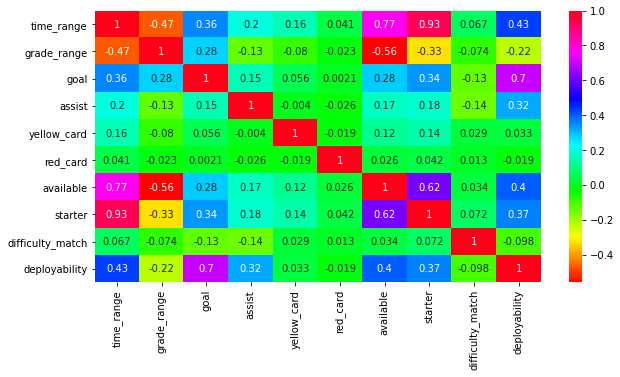

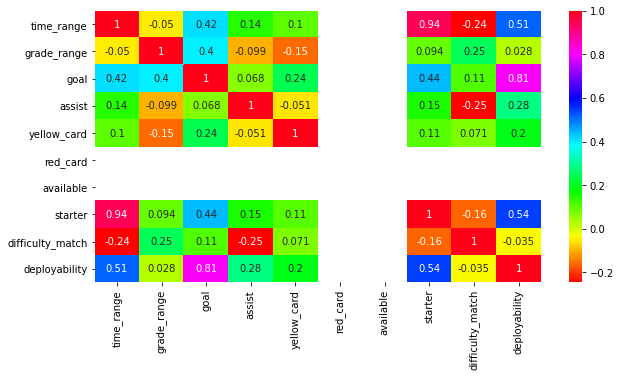

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.heatmap(df_p.drop('matchday', axis=1).corr(), annot=True, cmap='hsv')
plt.show()


plt.figure(figsize=(10,5))
sns.heatmap(df_simy_p.drop('matchday', axis=1).corr(), annot=True, cmap='hsv')
plt.show()

# Deployability -> True :- grade>=6 || (difficulty_math<=2 && starter=True)

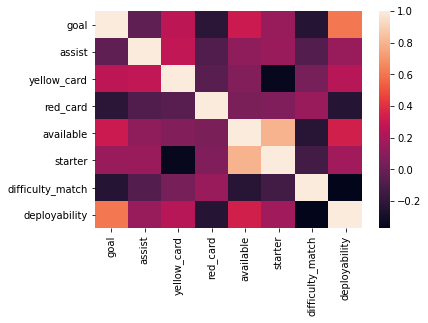

In [ ]:
sns.heatmap(df_immobile.drop('matchday', axis=1).corr())
plt.show()

In [ ]:
df = pd.read_csv("stats_muriel.csv")

In [ ]:
from pgmpy.estimators import BayesianEstimator

model.fit(df, estimator=BayesianEstimator,prior_type="BDeu",equivalent_sample_size=1)
print(model.get_cpds("grade_range"))

# Fitting model
model_2.fit(df, estimator=BayesianEstimator,prior_type="BDeu",equivalent_sample_size=10,complete_samples_only=False)
print(model_2.get_cpds("grade_range"))

+--------------------+----------------------+----------------------+----------------------+----------------------+
| assist             | assist(False)        | assist(False)        | assist(True)         | assist(True)         |
+--------------------+----------------------+----------------------+----------------------+----------------------+
| goal               | goal(False)          | goal(True)           | goal(False)          | goal(True)           |
+--------------------+----------------------+----------------------+----------------------+----------------------+
| red_card           | red_card(False)      | red_card(False)      | red_card(False)      | red_card(False)      |
+--------------------+----------------------+----------------------+----------------------+----------------------+
| yellow_card        | yellow_card(False)   | yellow_card(False)   | yellow_card(False)   | yellow_card(False)   |
+--------------------+----------------------+----------------------+------------

In [ ]:
from pgmpy.inference import VariableElimination

inference = VariableElimination(model)
print(inference.query(['grade_range']
                      ,{'deployability': True}
                      ))


Eliminating: starter: 100%|██████████| 7/7 [00:00<00:00, 180.09it/s]

+--------------------+--------------------+
| grade_range        |   phi(grade_range) |
+====================+====================+
| grade_range(6-7)   |             0.3228 |
+--------------------+--------------------+
| grade_range(<=5.5) |             0.0154 |
+--------------------+--------------------+
| grade_range(>=9.5) |             0.6018 |
+--------------------+--------------------+
| grade_range(sv)    |             0.0600 |
+--------------------+--------------------+


-------------------------------------------------------------------------------- 

available 
Markov blanket -> ['starter']


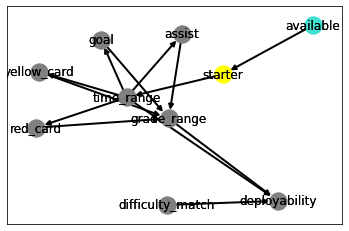

-------------------------------------------------------------------------------- 

starter 
Markov blanket -> ['time_range', 'available']


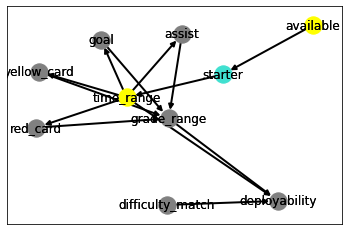

-------------------------------------------------------------------------------- 

time_range 
Markov blanket -> ['red_card', 'difficulty_match', 'goal', 'deployability', 'grade_range', 'assist', 'yellow_card', 'starter']


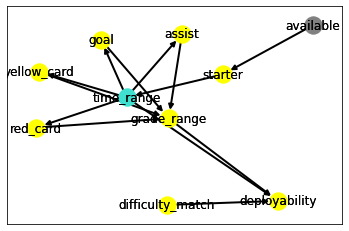

-------------------------------------------------------------------------------- 

red_card 
Markov blanket -> ['time_range', 'goal', 'grade_range', 'assist', 'yellow_card']


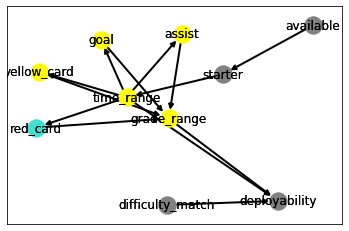

-------------------------------------------------------------------------------- 

yellow_card 
Markov blanket -> ['red_card', 'time_range', 'goal', 'grade_range', 'assist']


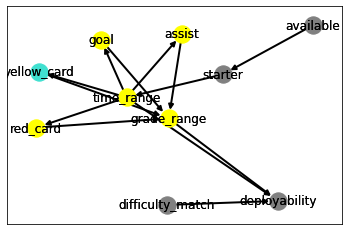

-------------------------------------------------------------------------------- 

goal 
Markov blanket -> ['red_card', 'time_range', 'grade_range', 'assist', 'yellow_card']


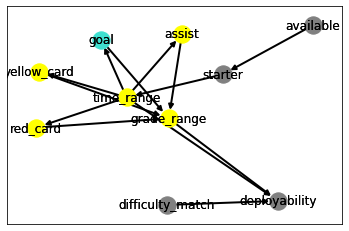

-------------------------------------------------------------------------------- 

assist 
Markov blanket -> ['red_card', 'time_range', 'goal', 'grade_range', 'yellow_card']


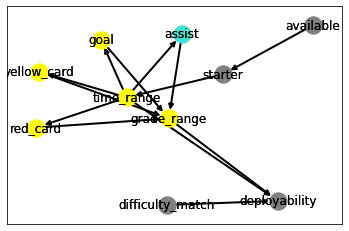

-------------------------------------------------------------------------------- 

grade_range 
Markov blanket -> ['red_card', 'difficulty_match', 'time_range', 'goal', 'deployability', 'assist', 'yellow_card']


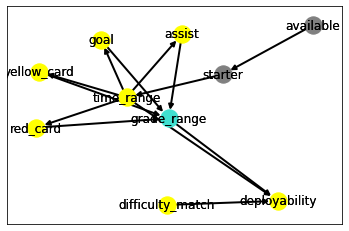

-------------------------------------------------------------------------------- 

difficulty_match 
Markov blanket -> ['time_range', 'grade_range', 'deployability']


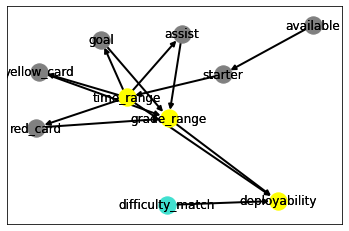

In [ ]:
from pgmpy.models import NoisyOrModel

leaves = model.get_leaves()
markov_blanket = {}

for node in nodes:
    if not node in leaves:
        markov_blanket[node] = model.get_markov_blanket(node)
        print("-"*80,"\n")
        print(node, "\nMarkov blanket ->", markov_blanket[node])
        
        nx.draw_networkx_nodes(DAG, pos, nodelist=[node], node_color='turquoise')
        nx.draw_networkx_nodes(DAG, pos, nodelist=markov_blanket[node], node_color='yellow')
        nx.draw_networkx_nodes(DAG, pos, 
               nodelist = [n for n in nodes if n not in markov_blanket[node] and n != node], 
               node_color='grey')
        nx.draw_networkx_labels(DAG, pos)
        nx.draw_networkx_labels(DAG, pos)
        nx.draw_networkx_edges(DAG, pos, edge_color='black', width = 2.0, arrows=True)
        plt.show()